# Data Preparation for Multivariable Regression: NY Crime Data in 2013

I'll prepare this data to model with multivariable regression (including data cleaning) according to this specification:

$$ Property crime = \alpha + Population + Population^2 + Murder + Robbery$$



In [238]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 1. Explarotary Data Analysis (EDA)

In [239]:
path = r'C:\Users\hafeez_poldz\Desktop\Thinkful\Unit 2\datas\table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls'
df = pd.read_excel(path, header = 4)
df.dtypes

City                                       object
Population                                float64
Violent\ncrime                            float64
Murder and\nnonnegligent\nmanslaughter    float64
Rape\n(revised\ndefinition)1              float64
Rape\n(legacy\ndefinition)2               float64
Robbery                                   float64
Aggravated\nassault                       float64
Property\ncrime                           float64
Burglary                                  float64
Larceny-\ntheft                           float64
Motor\nvehicle\ntheft                     float64
Arson3                                    float64
dtype: object

In [240]:
df.shape

(351, 13)

In [241]:
df.isnull().sum()

City                                        0
Population                                  3
Violent\ncrime                              3
Murder and\nnonnegligent\nmanslaughter      3
Rape\n(revised\ndefinition)1              351
Rape\n(legacy\ndefinition)2                 3
Robbery                                     3
Aggravated\nassault                         3
Property\ncrime                             3
Burglary                                    3
Larceny-\ntheft                             3
Motor\nvehicle\ntheft                       3
Arson3                                    164
dtype: int64

EDA shows that dataset has 13 columns and 352 entries. The variables we need to deal with have 3 missing values which is not significant. I'll drop them later.
## 1.1 Univariate Analysis
Firts, I explore the population

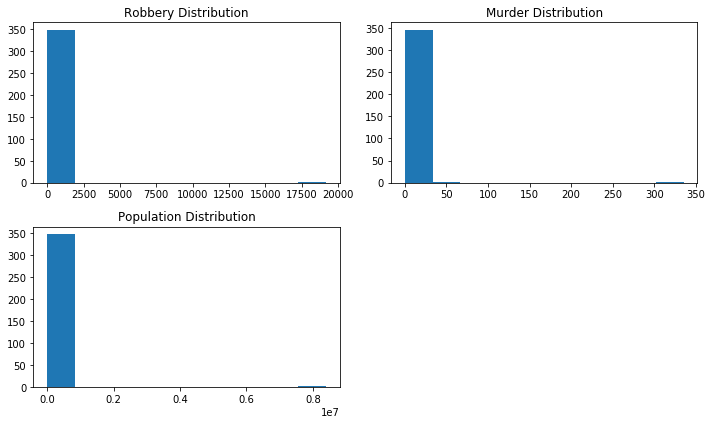

In [242]:
# population distribution
fig = plt.figure(figsize = (10,6))

fig.add_subplot(221)
plt.hist(df['Robbery'])
plt.title('Robbery Distribution')

fig.add_subplot(222)
plt.hist(df['Murder and\nnonnegligent\nmanslaughter'].dropna())
plt.title('Murder Distribution')

fig.add_subplot(223)
plt.hist(df['Population'].dropna())
plt.title('Population Distribution')
plt.tight_layout()
plt.show()


Selected variables do not look normally distributed. And we have outliers in our dataset. Seems, I'll need to normalize it using np.log() and remove outliers.
## 2. Data Cleaning & Manipulation
Here I'll rename columns to facilitate the work, drop the last 3 rows with missing values and convert selected variables from float64 to int64

In [243]:
# rename the column
df.rename(columns = {'Murder and\nnonnegligent\nmanslaughter':'Murder', 'Property\ncrime':'Property_crime'}, inplace = True)

# remove last 3 rows 
df.drop(df.iloc[348:, :].index, inplace = True)

for col in ['Population', 'Murder', 'Robbery', 'Property_crime']:
    df[col] = df[col].astype(np.int64)
df.isnull().sum()
print(df.dtypes)

City                             object
Population                        int64
Violent\ncrime                  float64
Murder                            int64
Rape\n(revised\ndefinition)1    float64
Rape\n(legacy\ndefinition)2     float64
Robbery                           int64
Aggravated\nassault             float64
Property_crime                    int64
Burglary                        float64
Larceny-\ntheft                 float64
Motor\nvehicle\ntheft           float64
Arson3                          float64
dtype: object


## 3. Feature selection
We already know that our dependant variable is Property Crime and independent variables are Murder, Robbery, Population.

In [244]:
# create a dataframe to hold features
features = pd.DataFrame()
features['property_crime'] = df['Property_crime']
features['murder'] = np.where(df['Murder']>=1, 1, 0)
features['robbery'] = np.where(df['Robbery']>=1, 1, 0)

# check if it works
print(df['Robbery'].groupby(features['robbery']).describe())

         count       mean          std  min  25%  50%   75%      max
robbery                                                             
0        139.0    0.00000     0.000000  0.0  0.0  0.0   0.0      0.0
1        209.0  121.38756  1329.475239  1.0  1.0  4.0  12.0  19170.0


In [245]:
# create the last feature
features['population'] = df['Population']
features['population_squared'] = np.square(features.population)
features.describe()

,property_crime,murder,robbery,population,population_squared
count,348.000000,348.000000,348.000000,3.480000e+02,3.480000e+02
mean,792.606322,0.140805,0.600575,4.003763e+04,2.035547e+11
std,7659.724746,0.348321,0.490486,4.500374e+05,3.778876e+12
min,0.000000,0.000000,0.000000,5.260000e+02,2.766760e+05
25%,40.500000,0.000000,0.000000,3.003000e+03,9.018117e+06
50%,112.500000,0.000000,1.000000,7.233500e+03,5.232568e+07
75%,341.000000,0.000000,1.000000,1.842750e+04,3.397536e+08
max,141971.000000,1.000000,1.000000,8.396126e+06,7.049493e+13
